In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Types of Logistic Regression techniques:

#### 1. Multinomial Logistic Regression : 

    1. This technique handles the multi-class problem by fitting K-1 independent binary logistic classifier model.
    2. One-vs-all
    3. Isn't used widely because it does not scale very well in the presence of a large number of target classes. In addition, since it builds K - 1 models, we require a much larger data set to achieve reasonable accuracy.
   
#### 2. Ordinal Logistic Regression:

    1. This technique is used when the target variable is ordinal in nature. Let's say, we want to predict years of work experience (1,2,3,4,5, etc). So, there exists an order in the value, i.e., 5>4>3>2>1.
    2. When we train K -1 models, Ordinal Logistic Regression builds a single model with multiple threshold values.
    3. If we have K classes, the model will require K -1 threshold or cutoff points. Also, it makes an imperative assumption of proportional odds. The assumption says that on a logit (S shape) scale, all of the thresholds lie on a straight line.

## Evaluation Logistic Regression model fit and accuracy :

#### 1. Akaike Information Criteria (AIC) / Bayesian Information Criteria (BIC):
    1. AIC and BIC values are like adjusted R-squared values in linear regression.
    2. Stand-alone model AIC has no real use, but if we are choosing between the models AIC really helps.
    3. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.
    4. If we are choosing between two models, a model with less AIC is preferred.
    5. AIC is an estimate of the information lost when a given model is used to represent the process that generates the data.
    6. Formula : AIC= -2ln(L)+ 2k
        L be the maximum value of the likelihood function for the model.
        k is the number of independent variables.
    7. BIC is a substitute to AIC with a slightly different formula. We will follow either AIC or BIC throughout our analysis.
    8. BIC = -2 * LL + log(N) * k
        log() has the base-e called the natural logarithm
        LL is the log-likelihood of the model
        N is the number of examples in the training dataset
        k is the number of parameters in the model.
    
#### 2. Null Deviance and Residual Deviance

    1. Deviance of an observation is computed as -2 times log likelihood of that observation.
    2. Null deviance is calculated from the model with no features, i.e.,only intercept. The null model predicts class via a constant probability.
    3. Residual deviance is calculated from the model having all the features.
    4. The larger the difference between null and residual deviance, better the model.
    5. Use these metrics to compared multiple models: whichever model has a lower null deviance, means that the model explains deviance pretty well, and is a better model. Also, lower the residual deviance, better the model.
    6. IMPORTANT : Practically, AIC is always given preference above deviance to evaluate model fit.
    
#### 3. Confusion Matrix

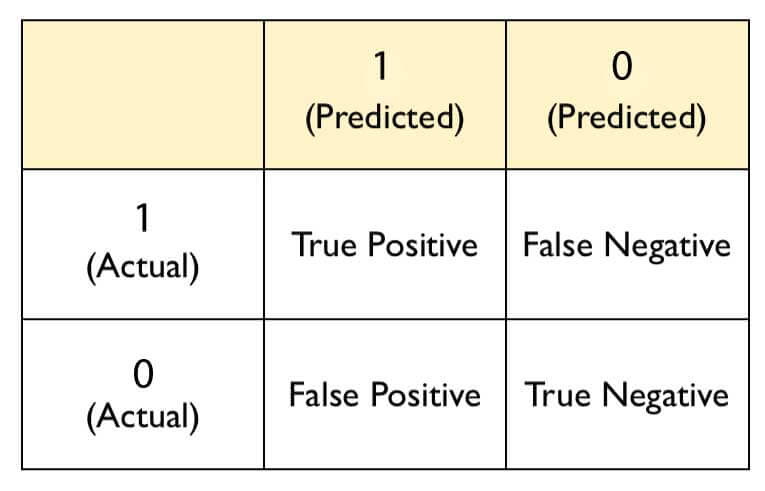

    1. Accuracy - It determines the overall predicted accuracy of the model. It is calculated as Accuracy  = (True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)

    2. True Positive Rate (TPR) / Sensitivity / Recall - It indicates how many positive values, out of all the positive values, have been correctly predicted. The formula to calculate the true positive rate is (TP/TP + FN). Also, TPR =  1 - False Negative Rate. 

    3. False Positive Rate (FPR) - It indicates how many negative values, out of all the negative values, have been incorrectly predicted. The formula to calculate the false positive rate is (FP/FP + TN). Also, FPR = 1 - True Negative Rate.

    4. True Negative Rate (TNR) - It indicates how many negative values, out of all the negative values, have been correctly predicted. The formula to calculate the true negative rate is (TN/TN + FP). It is also known as Specificity.

    5. False Negative Rate (FNR) - It indicates how many positive values, out of all the positive values, have been incorrectly predicted. The formula to calculate false negative rate is (FN/FN + TP).

    6. Precision: It indicates how many values, out of all the predicted positive values, are actually positive. It is formulated as:(TP / TP + FP). 
    
    7. F Score: F score is the harmonic mean of precision and recall. It lies between 0 and 1. Higher the value, better the model. It is formulated as 2((precision*recall) / (precision+recall)). 
    
#### 4. Receiver Operator Characteristic (ROC)

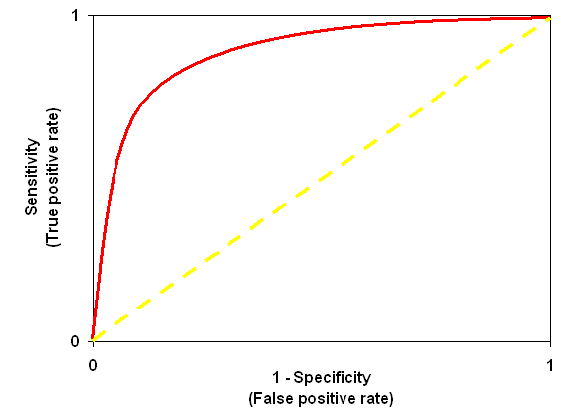

    1. Higher the curve, better the model. The yellow line represents the ROC curve at 0.5 threshold. At this point, sensitivity = specificity.
    2. Maximum value = 1. Model is able to classify both the classes in the best way possible.

In [2]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.drop(['User ID'], inplace=True, axis=1)

In [6]:
dataset.shape

(400, 4)

In [7]:
le = LabelEncoder()

In [8]:
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [9]:
dataset.dropna()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [10]:
y = dataset['Purchased']

In [11]:
X = dataset.iloc[:,:-1]

In [12]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, C= 1e9)
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report,roc_auc_score

In [40]:
precision_score(y_test, y_pred)

0.896551724137931

In [41]:
recall_score(y_test, y_pred)

0.8125

In [42]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9154929577464789,
  'recall': 0.9558823529411765,
  'f1-score': 0.9352517985611511,
  'support': 68},
 '1': {'precision': 0.896551724137931,
  'recall': 0.8125,
  'f1-score': 0.8524590163934426,
  'support': 32},
 'accuracy': 0.91,
 'macro avg': {'precision': 0.906022340942205,
  'recall': 0.8841911764705883,
  'f1-score': 0.8938554074772969,
  'support': 100},
 'weighted avg': {'precision': 0.9094317629917436,
  'recall': 0.91,
  'f1-score': 0.9087581082674844,
  'support': 100}}

#### AUC ROC

In [43]:
roc_auc_score(y_test, y_pred)

0.8841911764705883

#### AIC / BIC

In [73]:
import statsmodels.api as sm

In [74]:
X_test = sm.add_constant(X_test)

In [77]:
logit = sm.GLM(y_test,X_test, family= sm.families.Binomial())

In [78]:
logit_result = logit.fit()

In [79]:
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.189
Date:                Sat, 07 Mar 2020   Deviance:                       52.378
Time:                        04:47:18   Pearson chi2:                     169.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1574      0.382     -3.029      0.002      -1.906      -0.408
x1             0.3565      0.358      0.996      0.319      -0.345       1.058
x2             2.7474      0.640      4.289      0.000       1.492       4.003
x3             1.3841      0.440      3.148      0.002       0.522       2.246
==============================================================================
"""

In [88]:
logit_result.deviance

52.37809911573472

In [83]:
mod = sm.Logit(y_test, X_test)

In [84]:
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.261890
         Iterations 8


In [85]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.5822
Time:                        04:51:36   Log-Likelihood:                -26.189
converged:                       True   LL-Null:                       -62.687
Covariance Type:            nonrobust   LLR p-value:                 9.741e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1574      0.382     -3.029      0.002      -1.906      -0.408
x1             0.3565      0.358      0.996      0.319      -0.345       1.058
x2             2.7474      0.640      4.289      0.000       1.492       4.003
x3             1.3841      0.440      3.148      0.002       0.522       2.246
==============================================================================
"""

In [87]:
Deviance = res.df_resid - res.df_model
Deviance

93.0